In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [43]:
def scrape_o_files(directory):
    names = []
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.0'):
                file = os.path.join(root, file)
                name = file.split("/")[-2][:-15]
                paths.append(file)
                names.append(name)
    return paths,names
def extract_tb_data(log_dir, scalar_name):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    scalar_events = event_acc.Scalars(scalar_name)
    w_times = [event.wall_time for event in scalar_events]
    step_nums = [event.step for event in scalar_events]
    vals = [event.value for event in scalar_events]
    relative_times = [(w_time - w_times[0]) / 60 for w_time in w_times]
    relative_time_s = [(w_time - w_times[0]) for w_time in w_times]
    return pd.DataFrame({'wall_time': w_times, 'min': relative_times, 'sec': relative_times, 'step': step_nums, 'value': vals})

def generate_plot(paths,names,title="plot",x_axis = "step",scalar_name = "returns/avg_episodic_return"):
    plt.figure()
    for i,path in enumerate(paths):
        data = extract_tb_data(path, scalar_name)
        plt.plot(data[x_axis], data['value']*100, label=names[i].replace('_', ' ').capitalize())
    plt.xlabel(x_axis.replace('_', ' ').capitalize())
    plt.ylabel(scalar_name.split("/")[-1].replace('_', ' ').capitalize())
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [35]:
DIR_PATH = "runs/reward_sucess_bench"
paths,names = scrape_o_files(DIR_PATH)
names

['PickCube-v1__R_Demo_05_Batchsize_2048__Q_lr_2e-3__Policy_lr_6e-4',
 'PickCube-v1__R_PER__alpha_0_2__beta_0_5__Beta_frames_1000000',
 'PickCube-v1__R_Batchsize_2048__Q_lr_2e-3__Policy_lr_6e-4']

In [45]:
names = \
['With Demodata',
 'With PER',
 'Baseline SAC',]

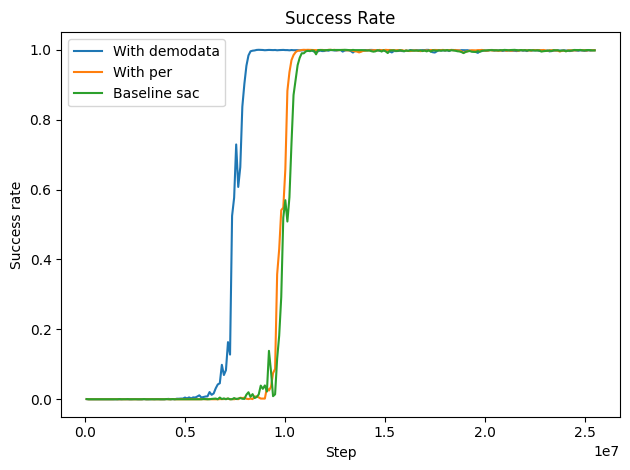

In [46]:
generate_plot(paths,names,x_axis="step",scalar_name="returns/success_rate",title="Success Rate")